<a href="https://colab.research.google.com/github/Ervita5/Last-mile/blob/main/Ilustrasi_Masalah_Metode_Intuitif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

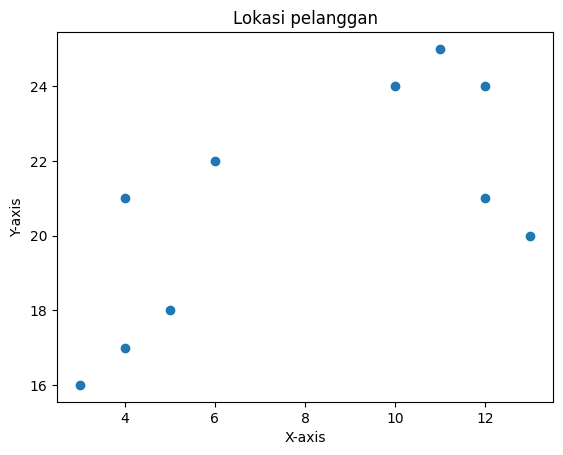

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data koordinat
data = np.array([[4, 21, 1], [5, 18, 1], [10, 24, 1], [4, 17, 1], [3, 16, 1], [11, 25, 1], [12, 24, 1], [6, 22, 1], [13, 20, 1], [12, 21, 1]])

# Pisahkan data menjadi x dan y
x = data[:, 0]
y = data[:, 1]

# Memisahkan data menjadi dua kategori (misalnya, menggunakan warna berbeda)
kategori_1 = data[data[:, 2] == 1]
kategori_2 = data[data[:, 2] == 2]

# Plot data
plt.scatter(kategori_1[:, 0], kategori_1[:, 1], label='Kategori 1')
plt.scatter(kategori_2[:, 0], kategori_2[:, 1], label='Kategori 2')

# Beri label pada sumbu x dan y
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.title('Lokasi pelanggan')
# Tampilkan plot
plt.show()


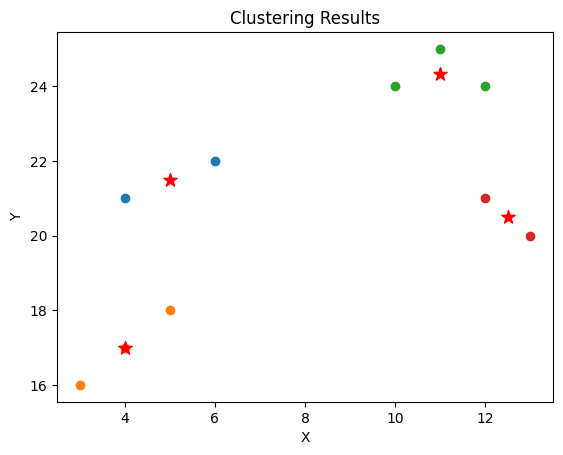

In [ ]:
import numpy as np

def euclidean_distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

def assign_to_clusters(data, centroids):
    clusters = [{'center': centroid, 'points': []} for centroid in centroids]

    for point in data:
        distances = [euclidean_distance(point, centroid['center']) for centroid in clusters]
        cluster_index = np.argmin(distances)
        clusters[cluster_index]['points'].append(point)

    return clusters

# Definisi data dan pusat kluster
data = [
    [4, 21, 1], [6, 22, 1],
    [5, 18, 1], [4, 17, 1], [3, 16, 1],
    [10, 24, 1], [11, 25, 1], [12, 24, 1],
    [13, 20, 1], [12, 21, 1]
]

cluster_centers = [
    [5, 21.5, 1],
    [4, 17, 1],
    [11, 24.33333333, 1],
    [12.5, 20.5, 1]
]

# Menggunakan fungsi assign_to_clusters
result_clusters = assign_to_clusters(data, cluster_centers)

# Menampilkan hasil dalam format yang diinginkan
for cluster in result_clusters:
    center = {'center': np.array(cluster['center']), 'points': [np.array(point) for point in cluster['points']]}

import matplotlib.pyplot as plt

# Mengambil data untuk plot
for cluster in result_clusters:
    center = np.array(cluster['center'])
    points = np.array(cluster['points'])

    # Plot titik-titik dalam klaster
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {center}')

    # Plot pusat klaster
    plt.scatter(center[0], center[1], marker='*', s=100, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering Results')

plt.show()



In [ ]:
# Menghitung jarak dari pusat kluster ke titik-titik observasi
for i, cluster in enumerate(result_clusters):
    center = cluster_centers[i][:2]  # Mengambil dua koordinat pertama dari pusat kluster
    points = np.array(cluster['points'])[:, :2]  # Mengambil kolom pertama dan kedua (X dan Y) dari setiap titik

    print(f"Jarak dari Pusat Kluster {i + 1} ke Titik-titik Observasi:")

    for point in points:
        distance = euclidean_distance(center, point)
        print(f"   Jarak dari {center} ke {point} adalah {distance:.2f} satuan")


Jarak dari Pusat Kluster 1 ke Titik-titik Observasi:
   Jarak dari [5, 21.5] ke [ 4 21] adalah 1.12 satuan
   Jarak dari [5, 21.5] ke [ 6 22] adalah 1.12 satuan
Jarak dari Pusat Kluster 2 ke Titik-titik Observasi:
   Jarak dari [4, 17] ke [ 5 18] adalah 1.41 satuan
   Jarak dari [4, 17] ke [ 4 17] adalah 0.00 satuan
   Jarak dari [4, 17] ke [ 3 16] adalah 1.41 satuan
Jarak dari Pusat Kluster 3 ke Titik-titik Observasi:
   Jarak dari [11, 24.33333333] ke [10 24] adalah 1.05 satuan
   Jarak dari [11, 24.33333333] ke [11 25] adalah 0.67 satuan
   Jarak dari [11, 24.33333333] ke [12 24] adalah 1.05 satuan
Jarak dari Pusat Kluster 4 ke Titik-titik Observasi:
   Jarak dari [12.5, 20.5] ke [13 20] adalah 0.71 satuan
   Jarak dari [12.5, 20.5] ke [12 21] adalah 0.71 satuan


In [ ]:
# Menghitung jarak dari pusat kluster ke titik-titik observasi
for i, cluster in enumerate(result_clusters):
    center = cluster_centers[i][:2]  # Mengambil dua koordinat pertama dari pusat kluster
    Depot = ( 0,25 )
    print(f"Jarak dari depot ke pusat cluster {i + 1}:")

    for point in points:
        distance = euclidean_distance(center, Depot)
        print(f"   Jarak dari {Depot} ke {center} adalah {distance:.2f} satuan")


Jarak dari depot ke pusat cluster 1:
   Jarak dari (0, 25) ke [5, 21.5] adalah 6.10 satuan
   Jarak dari (0, 25) ke [5, 21.5] adalah 6.10 satuan
Jarak dari depot ke pusat cluster 2:
   Jarak dari (0, 25) ke [4, 17] adalah 8.94 satuan
   Jarak dari (0, 25) ke [4, 17] adalah 8.94 satuan
Jarak dari depot ke pusat cluster 3:
   Jarak dari (0, 25) ke [11, 24.33333333] adalah 11.02 satuan
   Jarak dari (0, 25) ke [11, 24.33333333] adalah 11.02 satuan
Jarak dari depot ke pusat cluster 4:
   Jarak dari (0, 25) ke [12.5, 20.5] adalah 13.29 satuan
   Jarak dari (0, 25) ke [12.5, 20.5] adalah 13.29 satuan


# Routing

In [ ]:
# Menghitung ukuran klaster
cluster_sizes = {tuple(np.round(np.array(cluster['center']), decimals=3)): len(cluster['points']) for cluster in result_clusters}

# Menampilkan ukuran klaster
print("Cluster Sizes:")
for center, size in cluster_sizes.items():
    print(f"Cluster {center}: {size} points")


Cluster Sizes:
Cluster (5.0, 21.5, 1.0): 2 points
Cluster (4, 17, 1): 3 points
Cluster (11.0, 24.333, 1.0): 3 points
Cluster (12.5, 20.5, 1.0): 2 points


In [ ]:
import numpy as np

# Fungsi untuk menghitung matriks jarak Euclidean antar lokasi
def generate_distance_matrix(locations):
    n = len(locations)
    distances = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            distances[i][j] = euclidean_distance(locations[i], locations[j])

    return distances

# Fungsi untuk menghitung jarak Euclidean antara dua titik
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Fungsi untuk inisialisasi kromosom dengan urutan titik menggunakan heuristik ANN
def ann_initialization(n, start_point, start_time, end_time, result_clusters, cluster_centers):
    remaining_points = set(range(1, n + 1))
    chromosome = [0] + [start_point + 1] + [0]

    if start_point + 1 in remaining_points:
        remaining_points.remove(start_point + 1)

    current_time = start_time

    while remaining_points:
        current_point = chromosome[-2] - 1

        if 0 <= current_point < n:
            nearest_neighbor = min(remaining_points, key=lambda x: euclidean_distance(cluster_centers[current_point], cluster_centers[x - 1]))

            cluster_sizes = {tuple(np.round(tuple(center), decimals=3)): len(cluster) for center, cluster in zip(cluster_centers, result_clusters)}
            truck_travel_time = euclidean_distance(cluster_centers[current_point], cluster_centers[nearest_neighbor - 1]) * 2

            current_cluster_size = cluster_sizes.get(current_point, 0)
            service_time_drone = (2 * 0.57 * 4) + (3 * current_cluster_size) +(5)

            current_cluster_size = cluster_sizes.get(current_point, 0)
            total_time = current_time + service_time_drone + truck_travel_time

            if start_time <= total_time <= end_time:
                chromosome.insert(-1, nearest_neighbor)
                remaining_points.remove(nearest_neighbor)
                current_time = total_time
        else:
            break

    return chromosome

# Membangkitkan populasi awal dengan urutan titik menggunakan heuristik ANN
def generate_initial_population_ann(n, size, start_time, end_time):
    population = []
    for i in range(size):
        chromosome = ann_initialization(n, i, start_time, end_time, result_clusters, cluster_centers)
        population.append(chromosome)
    return population

# Fungsi untuk menghitung time windows
def calculate_time_windows(chromosome, start_time, distances, depot_location, cluster_sizes):
    current_time = start_time
    time_windows = []

    cluster_sizes = {tuple(np.round(tuple(center), decimals=3)): len(cluster) for center, cluster in zip(cluster_centers, result_clusters)}
    for i in range(len(chromosome) - 1):
        current_point = chromosome[i]
        next_point = chromosome[i + 1]

        if current_point == 0:
            depot_to_start_distance = euclidean_distance(depot_location, cluster_centers[next_point - 1])
            truck_travel_time = depot_to_start_distance * 2
            total_time = current_time + truck_travel_time
        elif next_point == 0:
            end_to_depot_distance = euclidean_distance(cluster_centers[current_point - 1], depot_location)
            truck_travel_time = end_to_depot_distance * 2
            current_cluster_size = cluster_sizes.get(tuple(np.round(tuple(cluster_centers[current_point - 1][:2]), decimals=3)), 0)
            service_time_drone = (2 * 0.57 * 4) + (3 * current_cluster_size) +(5)
            total_time = current_time + service_time_drone + truck_travel_time
        else:
            current_cluster_size = cluster_sizes.get(tuple(np.round(tuple(cluster_centers[current_point - 1][:2]), decimals=3)), 0)
            service_time_drone = (2 * 0.57 * 4) + (3 * current_cluster_size) +(5)
            truck_travel_time = distances[current_point - 1][next_point - 1] * 2
            total_time = current_time + service_time_drone + truck_travel_time

        time_windows.append((convert_to_time(int(current_time)), convert_to_time(int(total_time))))
        current_time = total_time

    return time_windows

# Fungsi untuk menghitung total jarak
def calculate_total_distance(chromosome, distances, depot_location, start_time):
    total_distance = 0
    current_time = start_time

    for i in range(len(chromosome) - 1):
        current_point = chromosome[i]
        next_point = chromosome[i + 1]

        if current_point == 0 and next_point != 0:
            depot_to_start_distance = euclidean_distance(depot_location, cluster_centers[next_point - 1])
            total_distance += depot_to_start_distance
            truck_travel_distance = depot_to_start_distance
        elif current_point != 0 and next_point == 0:
            end_to_depot_distance = euclidean_distance(cluster_centers[current_point - 1], depot_location)
            total_distance += end_to_depot_distance
            truck_travel_distance = end_to_depot_distance
        else:
            truck_travel_distance = distances[current_point - 1][next_point - 1]
            total_distance += truck_travel_distance

    return total_distance

# Fungsi untuk mengonversi waktu dari menit ke format jam
def convert_to_time(minutes):
    hours = int(minutes) // 60
    minutes = int(minutes) % 60
    return f"{hours:02d}:{minutes:02d}"

# Input
depot_location = (0, 25)
n = len(cluster_centers)
ukuran_populasi = 4
start_time = 480
end_time = 1020

# Membuat matriks jarak
distances = generate_distance_matrix(cluster_centers)
print (distances)

# Membangkitkan populasi menggunakan ANN
population = generate_initial_population_ann(n, ukuran_populasi, start_time, end_time)

# Menghasilkan output
for idx, chrom in enumerate(population):
    total_distance = calculate_total_distance(chrom, distances, depot_location, start_time)
    tw = calculate_time_windows(chrom, start_time, distances, depot_location, cluster_sizes)
    tw_in_hours = [(start, end) for start, end in tw]

    print(f"Rute {idx + 1} : {chrom},\nTime Windows: {tw_in_hours}, \nTotal Distance: {total_distance} km")


[[ 0.          4.60977223  6.63534308  7.56637298]
 [ 4.60977223  0.         10.13793755  9.19238816]
 [ 6.63534308 10.13793755  0.          4.11636301]
 [ 7.56637298  9.19238816  4.11636301  0.        ]]
Rute 1 : [0, 1, 2, 4, 3, 0],
Time Windows: [('08:00', '08:12'), ('08:12', '08:30'), ('08:30', '08:58'), ('08:58', '09:16'), ('09:16', '09:48')], 
Total Distance: 35.04198470398977 km
Rute 2 : [0, 2, 1, 3, 4, 0],
Time Windows: [('08:00', '08:17'), ('08:17', '08:36'), ('08:36', '08:59'), ('08:59', '09:17'), ('09:17', '09:53')], 
Total Distance: 37.59108048057881 km
Rute 3 : [0, 3, 4, 1, 2, 0],
Time Windows: [('08:00', '08:22'), ('08:22', '08:39'), ('08:39', '09:04'), ('09:04', '09:23'), ('09:23', '09:50')], 
Total Distance: 36.25696362590774 km
Rute 4 : [0, 4, 3, 1, 2, 0],
Time Windows: [('08:00', '08:26'), ('08:26', '08:44'), ('08:44', '09:07'), ('09:07', '09:25'), ('09:25', '09:53')], 
Total Distance: 37.59108048057881 km


In [ ]:
import random
# Fungsi untuk menghitung nilai fitness
def calculate_fitness(chromosome, distances, depot_location, start_time, end_time):
    total_distance = 0 #Inisiasi total jarak tempuh rute

    # untuk memanipulasi agar pasangan titiknya berturut-turut (misalkan : 1 (x1,y1) ke 2 (x2,y2))
    for i in range(len(chromosome) - 1):
        # current_point diatur ke nilai dari elemen kromosom i
        current_point = chromosome[i]
        # next_poit diatur ke nilai pada elemen kromosom i + 1
        next_point = chromosome[i + 1]

        # Jika current_point merupakan depot maka akan dihitung jarak dan time windows dari depot
        # menghitung jarak dan time windpws dari depot ke titik awal
        if current_point == 0 and next_point != 0:
            # Jarak dan waktu tempuh dari depot ke lokasi awal
            depot_to_start_distance = euclidean_distance(depot_location, cluster_centers[next_point - 1])
            # 2 disini adalah kecepatan rata-rata truk dalam menit/km
            truck_travel_time = depot_to_start_distance * 2
            # menghitung jarak dari depot ke titik awal
            total_distance += depot_to_start_distance

        # Memeriksa apakah next_point adalah depot
        elif current_point != 0 and next_point == 0:
            # Jika next_point merupakan depot maka akan dihitung time windows dari titik terakhir ke depot
            # Jarak dan waktu tempuh dari lokasi akhir ke depot
            end_to_depot_distance = euclidean_distance(cluster_centers[current_point - 1], depot_location)
            # 2 disini adalah kecepatan rata-rata truk dalam menit/k
            truck_travel_time = end_to_depot_distance * 2
            # menghitung jarak dari titik terakhir ke depot
            total_distance += end_to_depot_distance

        else:
            # Perhitungan waktu tempuh truk
            truck_travel_time = distances[current_point - 1][next_point - 1] * 2

            # Perhitungan total waktu dan total distance untuk jalur
            total_distance += distances[current_point - 1][next_point - 1]

    # Menghitung nilai fitness
    fitness = (1 / (total_distance ))

    return fitness

# Fungsi seleksi menggunakan Roulette Wheel Selection
def roulette_wheel_selection(populasi, fitness_values):
    total_fitness = sum(fitness_values)
    pick = random.uniform(0, total_fitness)
    current_fitness = 0

    for i in range(len(populasi)):
        current_fitness += fitness_values[i]
        if current_fitness > pick:
            return populasi[i]

# Fungsi crossover menggunakan Order Crossover (OX)
def order_crossover(parent1, parent2):
    # Rentang yang akan diambil dari parent1 dan parent2 untuk disalin ke anak 1 dan 2
    start_index = 1
    end_index = 7

    child1 = [0] * len(parent1)  # child diinisialisasi sebagai array dengan panjang yang sama dengan panjang kromosom orang tua
    child2 = [0] * len(parent1)

    child1[start_index:end_index + 1] = parent1[start_index:end_index + 1]  # Menyalin sub kromosom dari parent1
    child2[start_index:end_index + 1] = parent2[start_index:end_index + 1]

    index_child1 = end_index + 1  # sebagai posisi yang akan diisi oleh parent 2
    index_child2 = end_index + 1

    # mengisi gen pada child yang tidak disalin oleh parent 1
    for gene in parent2[end_index + 1:] + parent2[:end_index + 1]:
        if gene not in child1:
            child1[index_child1 % len(parent1)] = gene
            index_child1 += 1

    for gene in parent1[end_index + 1:] + parent1[:end_index + 1]:
        if gene not in child2:
            child2[index_child2 % len(parent1)] = gene
            index_child2 += 1

    return child1, child2


# Fungsi mutasi menggunakan Inversion Mutation
def inversion_mutation(chromosome, prob_mutasi):
    # Rentang kromosom yang akan diambil untuk melakukan mutasi
    start_index = 1
    end_index = len(chromosome) - 2

    for i in range (len(chromosome)):
      if random.random()<prob_mutasi :
         #untuk memilih dua posisi secara acak
          pos1, pos2 = sorted(random.sample(range(start_index, end_index + 1), 2))
          # Melakukan inversi (memutar rute dari dua posisi acak yang telah dipilih)
          chromosome[pos1:pos2+1] = list(reversed(chromosome[pos1:pos2+1]))
    return chromosome

def genetic_algorithm(population_size, panjang_gen, generations, prob_crossover, prob_mutasi):
    n = len(distances)
    population = generate_initial_population_ann(n, ukuran_populasi, start_time, end_time)
    for generation in range(generations):
        fitness_values = [calculate_fitness(chromosome, distances, depot_location, start_time, end_time) for chromosome in population]

        best_index = np.argmax(fitness_values)  # Menggunakan np.argmax() untuk mendapatkan indeks kromosom terbaik
        hasil_terbaik = population[best_index]

        populasi_baru = []

        for _ in range(population_size // 2):
            parent1 = roulette_wheel_selection(population, fitness_values)
            parent2 = roulette_wheel_selection(population, fitness_values)

            if random.uniform(0, 1) < prob_crossover:
                child1, child2 = order_crossover(parent1, parent2)
            else:
                child1, child2 = parent1[:], parent2[:]

            child1 = inversion_mutation(child1, prob_mutasi)

            populasi_baru.extend([child1, child2])

        population = populasi_baru

    return hasil_terbaik

# Penggunaan algoritma genetika
population_size = 4
n = 4
generations = 100
prob_crossover = 0.6
prob_mutasi = 0.001

result = genetic_algorithm(population_size, n, generations, prob_crossover, prob_mutasi)
print("Hasil Terbaik (Chromosome):", result)

Hasil Terbaik (Chromosome): [0, 1, 2, 4, 3, 0]


In [ ]:
# menghitung time windows untuk best solution
# Menghasilkan output
total_distance = calculate_total_distance(result, distances, depot_location, start_time)
tw = calculate_time_windows(result, start_time, distances, depot_location, cluster_sizes)
tw_in_hours = [(start, end) for start, end in tw]

print(f"Rute {idx + 1} : {result},\nTime Windows: {tw_in_hours}, \nTotal Distance: {total_distance} km")

Rute 4 : [0, 1, 2, 4, 3, 0],
Time Windows: [('08:00', '08:12'), ('08:12', '08:30'), ('08:30', '08:58'), ('08:58', '09:16'), ('09:16', '09:48')], 
Total Distance: 35.04198470398977 km


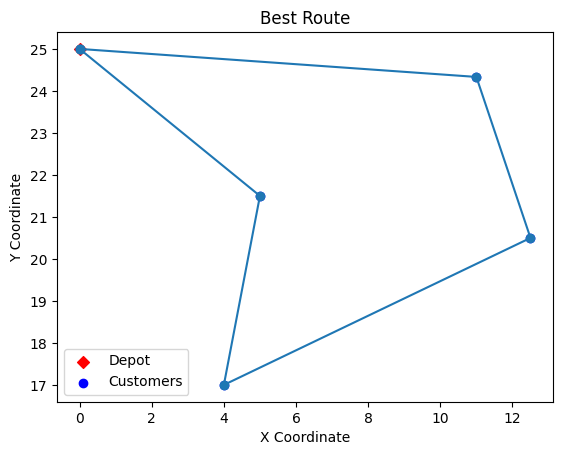

In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

# Fungsi untuk plotting rute terbaik
def plot_best_route(best_chromosome, depot_location, centers):
    route_x = []
    route_y = []

    for point in best_chromosome:
        x, y = centers[point - 1][:2] if point != 0 else depot_location
        route_x.append(x)
        route_y.append(y)

    # Kembali ke depot untuk menutup rute
    route_x.append(depot_location[0])
    route_y.append(depot_location[1])

    # Plot rute
    plt.plot(route_x, route_y, marker='o', linestyle='-')
    plt.scatter(depot_location[0], depot_location[1], color='red', marker='D', label='Depot')
    plt.scatter(centers[:, 0], centers[:, 1], color='blue', label='Customers')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Best Route')
    plt.legend()
    plt.show()

# Plot rute terbaik
plot_best_route(result, depot_location, np.array(cluster_centers))
